<a href="https://colab.research.google.com/github/Astraxx04/ML_Models/blob/main/Mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning - Data, Model, Cost function, Optimisation procedure

Linear Regression
Decision Trees
Support Vector Machines
Random Forests
Neural Networks

In [ ]:
#Python >=3.5 is required
import sys
assert sys.version_info >= (3,5)

#Importing package version >20.0
import sklearn
assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import os

#to make this notebooks output stable across runs
np.random.seed(42)

#to plot pretty figures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

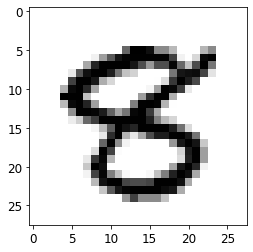

In [ ]:
some_digit = X[1790]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("on")
plt.show()

In [ ]:
y[1790]

'8'

In [ ]:
y = y.astype(np.uint8)
#for i in range(70000):
#  y[i]=int(y[i])

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [ ]:
#Training a binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([False])

In [ ]:
#Perforance measure
#split the train data into 3 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [ ]:
#Never5 Classifier
nvr5_clf= Never5Classifier()
cross_val_score(nvr5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

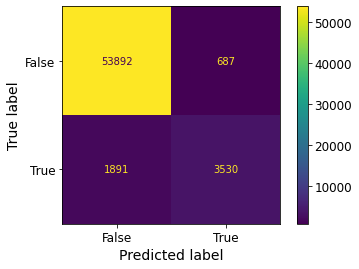

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_train_5, y_train_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=sgd_clf.classes_)
disp.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_clf.fit(X_train, y_train_5)
rfc_clf.predict([some_digit])

array([False])

In [ ]:
y_train_pred_forest = cross_val_predict(rfc_clf, X_train, y_train_5, cv=3)

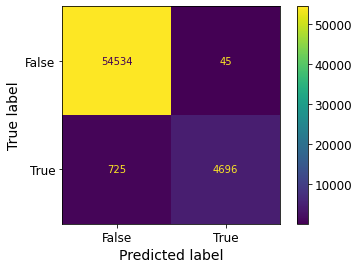

In [ ]:
cm=confusion_matrix(y_train_5, y_train_pred_forest)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc_clf.classes_)
disp.plot()

In [ ]:
#Multiclass Classification

X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_small, y_train_small)
svm_clf.predict([some_digit])

array([8], dtype=uint8)

In [ ]:
y_svm_pred = cross_val_predict(
    SVC(random_state=42),
    X_train_small, y_train_small, cv=3
)

In [ ]:
#Measure accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train_small, y_svm_pred)

0.9552

In [ ]:
cm=confusion_matrix(y_train_small, y_svm_pred, labels=svm_clf.classes_)
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm/row_sums
np.fill_diagonal(norm_conf_mx, 0)


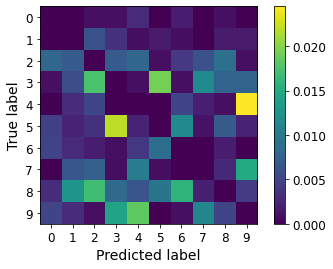

In [ ]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=norm_conf_mx, 
    display_labels=svm_clf.classes_)
disp.plot(include_values=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)
knn_clf.fit(X_train_small, y_train_small)
knn_clf.predict([some_digit])

array([8], dtype=uint8)

In [ ]:
y_knn_pred=cross_val_predict(
    knn_clf,
    X_train_small, y_train_small, cv=3
)

In [ ]:
accuracy_score(y_train_small, y_knn_pred)

0.9398

In [ ]:
cm=confusion_matrix(y_train_small, y_knn_pred, labels=knn_clf.classes_)
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm/row_sums
np.fill_diagonal(norm_conf_mx, 0)

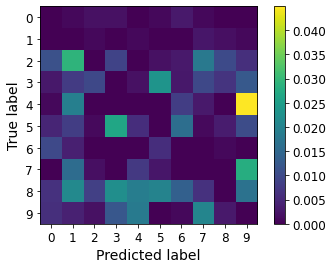

In [ ]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=norm_conf_mx, 
    display_labels=knn_clf.classes_)
disp.plot(include_values=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled_small= X_train_scaled[:10000]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = [
    LogisticRegression(max_iter=1000),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(weights="distance")
]